# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Molly Strickland

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [ ]:
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [5]:
# url
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

try:
    # Fetch the webpage content
    response = requests.get(url)
    response.raise_for_status()

    soup = BeautifulSoup(response.content, "html.parser")

    # Extract the article content
    article = soup.find('article')
    article_html = article.prettify() if article else "Content not found"

    # Save the content to a .pkl file
    output_path = r"C:\Users\missm\OneDrive\Documents\ML & NLP\Mod6_WebScrapingNLP_Strick\headlights_article.pkl"
    with open(output_path, "wb") as file:
        pickle.dump(article_html, file)

    print(f"Article saved to {output_path}")
except requests.exceptions.RequestException as e:
    print(f"Error fetching the webpage: {e}")
except Exception as e:
    print(f"An error occurred: {e}")


Article saved to C:\Users\missm\OneDrive\Documents\ML & NLP\Mod6_WebScrapingNLP_Strick\headlights_article.pkl


2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [7]:
# Extract and print the text content
article_text = soup.get_text()
print(article_text)

















How Laser Headlights Work | Hackaday






































































Skip to content






Hackaday


Primary Menu

Home
Blog
Hackaday.io
Tindie
Hackaday Prize
Submit
About


Search for:



 March 27, 2021 






How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype 

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [ ]:
# Load a trained spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Process the text
doc = nlp(article_text)

# Filter tokens and count frequencies
filtered_tokens = [
    token.text.lower() for token in doc 
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count the token frequencies
token_counts = Counter(filtered_tokens)

# Get the 5 most common tokens
most_common_tokens = token_counts.most_common(5)

# Print results
print("Top 5 Most Frequent Tokens:")
for token, freq in most_common_tokens:
    print(f"Token: {token}, Frequency: {freq}")

c:\Users\missm\OneDrive\Documents\ML & NLP\Mod6_WebScrapingNLP_Strick\Mod6venv\lib\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.7.1) was trained with spaCy v3.7.2 and may not be 100% compatible with the current version (3.7.0). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


Top 5 Most Frequent Tokens:
Token: laser, Frequency: 35
Token: headlights, Frequency: 19
Token: headlight, Frequency: 11
Token: technology, Frequency: 10
Token: led, Frequency: 10


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [11]:
# Step 1: Load the article HTML content from the .pkl file
file_path = r"C:\Users\missm\OneDrive\Documents\ML & NLP\Mod6_WebScrapingNLP_Strick\headlights_article.pkl"

with open(file_path, "rb") as file:
    article_html = pickle.load(file)

# Step 2: Parse the HTML and extract text
soup = BeautifulSoup(article_html, "html.parser")
article_text = soup.get_text()

# Step 3: Load a trained spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Step 4: Process the text
doc = nlp(article_text)

# Step 5: Filter and lemmatize tokens
filtered_lemmas = [
    token.lemma_.lower() for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count the lemma frequencies
lemma_counts = Counter(filtered_lemmas)

# Get the 5 most common lemmas
most_common_lemmas = lemma_counts.most_common(5)

# Step 6: Print results
print("Top 5 Most Frequent Lemmas:")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: {lemma}, Frequency: {freq}")

Top 5 Most Frequent Lemmas:
Lemma: laser, Frequency: 40
Lemma: headlight, Frequency: 28
Lemma: beam, Frequency: 12
Lemma: technology, Frequency: 10
Lemma: light, Frequency: 10


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [1]:
import spacy

# Method to score a sentence by interesting tokens
def score_sentence_by_token(sentence, interesting_tokens):
    # Load a spaCy model
    nlp = spacy.load("en_core_web_sm")
    # Process the sentence
    doc = nlp(sentence)
    # Convert tokens to lowercase for comparison
    tokens = [token.text.lower() for token in doc]
    # Calculate score
    token_count = sum(1 for token in tokens if token in interesting_tokens)
    return token_count / len(tokens) if len(tokens) > 0 else 0

# Method to score a sentence by interesting lemmas
def score_sentence_by_lemma(sentence, interesting_lemmas):
    # Load a spaCy model
    nlp = spacy.load("en_core_web_sm")
    # Process the sentence
    doc = nlp(sentence)
    # Extract lemmas from the sentence
    lemmas = [token.lemma_.lower() for token in doc]
    # Calculate score
    lemma_count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    return lemma_count / len(lemmas) if len(lemmas) > 0 else 0

#Testing Methods
# Define the first sentence of the article
first_sentence = "Laser headlights are a new technology for improving visibility on the road."

# Interesting tokens and lemmas (from your analysis)
interesting_tokens = ["laser", "headlights", "headlight", "technology", "led"]
interesting_lemmas = ["laser", "headlight", "beam", "technology", "light"]

# Test the methods
token_score = score_sentence_by_token(first_sentence, interesting_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, interesting_lemmas)

# Print the results
print(f"Score by Token: {token_score}")
print(f"Score by Lemma: {lemma_score}")



Score by Token: 0.23076923076923078
Score by Lemma: 0.23076923076923078


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

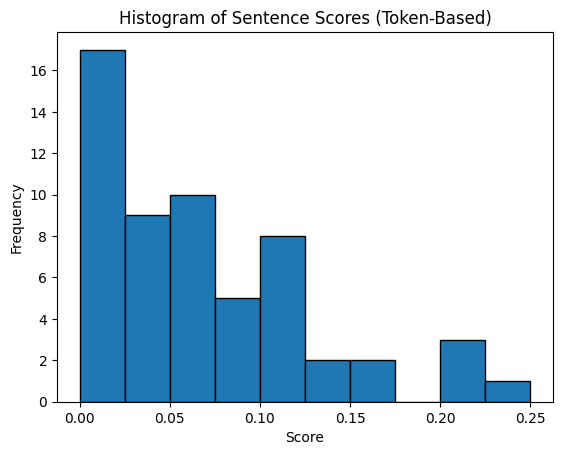

In [5]:
import pickle
from bs4 import BeautifulSoup
from collections import Counter
import spacy
import matplotlib.pyplot as plt

# Step 1: Load the article HTML content from the .pkl file
file_path = r"C:\Users\missm\OneDrive\Documents\ML & NLP\Mod6_WebScrapingNLP_Strick\headlights_article.pkl"

with open(file_path, "rb") as file:
    article_html = pickle.load(file)

# Step 2: Parse the HTML and extract text
soup = BeautifulSoup(article_html, "html.parser")
article_text = soup.get_text()

# Step 3: Load the spaCy pipeline and split the text into sentences
nlp = spacy.load("en_core_web_sm")
doc = nlp(article_text)
sentences = list(doc.sents)

# Step 4: Define the scoring function
def score_sentence_by_token(sentence, interesting_tokens):
    tokens = [token.text.lower() for token in sentence]
    token_count = sum(1 for token in tokens if token in interesting_tokens)
    return token_count / len(tokens) if len(tokens) > 0 else 0

# Step 5: Define the interesting tokens
interesting_tokens = ["laser", "headlights", "headlight", "technology", "led"]

# Step 6: Calculate scores for each sentence
sentence_scores = [score_sentence_by_token(sentence, interesting_tokens) for sentence in sentences]

# Step 7: Plot the histogram
plt.hist(sentence_scores, bins=10, edgecolor='black')
plt.title("Histogram of Sentence Scores (Token-Based)")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

# Step 8: Comment on the most common range of scores
# The most common range of scores appears to be between 0.0 and 0.1, as indicated by the histogram.


7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

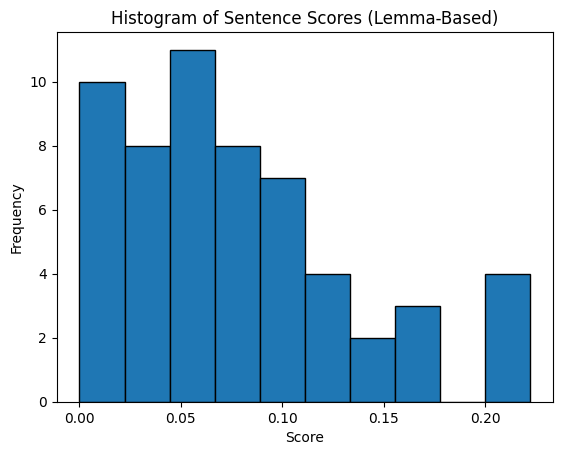

In [6]:
import pickle
from bs4 import BeautifulSoup
from collections import Counter
import spacy
import matplotlib.pyplot as plt

# Step 1: Load the article HTML content from the .pkl file
file_path = r"C:\Users\missm\OneDrive\Documents\ML & NLP\Mod6_WebScrapingNLP_Strick\headlights_article.pkl"

with open(file_path, "rb") as file:
    article_html = pickle.load(file)

# Step 2: Parse the HTML and extract text
soup = BeautifulSoup(article_html, "html.parser")
article_text = soup.get_text()

# Step 3: Load the spaCy pipeline and split the text into sentences
nlp = spacy.load("en_core_web_sm")
doc = nlp(article_text)
sentences = list(doc.sents)

# Step 4: Define the scoring function
def score_sentence_by_lemma(sentence, interesting_lemmas):
    lemmas = [token.lemma_.lower() for token in sentence]
    lemma_count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    return lemma_count / len(lemmas) if len(lemmas) > 0 else 0

# Step 5: Define the interesting lemmas
interesting_lemmas = ["laser", "headlight", "beam", "technology", "light"]

# Step 6: Calculate scores for each sentence
sentence_scores = [score_sentence_by_lemma(sentence, interesting_lemmas) for sentence in sentences]

# Step 7: Plot the histogram
plt.hist(sentence_scores, bins=10, edgecolor='black')
plt.title("Histogram of Sentence Scores (Lemma-Based)")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

# Step 8: Comment on the most common range of scores
# The most common range of scores appears to be between 0.0 and 0.1, based on the histogram.


8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

led was omitted. see below for how the code would work for considering nouns only

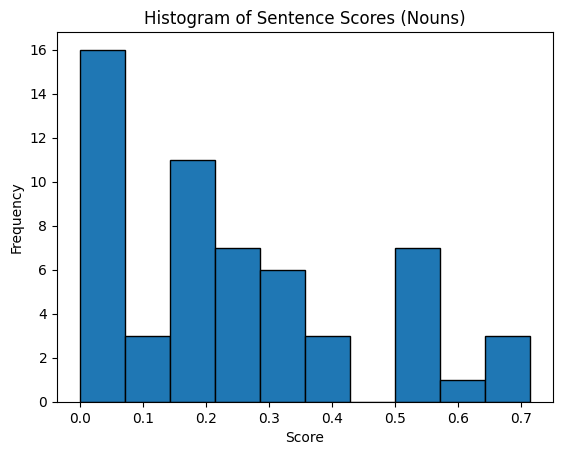

In [9]:
import pickle
from bs4 import BeautifulSoup
from collections import Counter
import spacy
import matplotlib.pyplot as plt

# Step 1: Load the article HTML content from the .pkl file
file_path = r"C:\Users\missm\OneDrive\Documents\ML & NLP\Mod6_WebScrapingNLP_Strick\headlights_article.pkl"

with open(file_path, "rb") as file:
    article_html = pickle.load(file)

# Step 2: Parse the HTML and extract text
soup = BeautifulSoup(article_html, "html.parser")
article_text = soup.get_text()

# Step 3: Load the spaCy pipeline and split the text into sentences
nlp = spacy.load("en_core_web_sm")
doc = nlp(article_text)
sentences = list(doc.sents)

# Step 4: Define the scoring function
def score_sentence_by_noun(sentence, interesting_words):
    nouns = [token.text.lower() for token in sentence if token.pos_ == 'NOUN']
    count = sum(1 for noun in nouns if noun in interesting_words)
    return count / len(nouns) if len(nouns) > 0 else 0


# Step 5: Define the interesting lemmas
interesting_words = ["beam", "light", "laser", "headlights", "headlight", "technology" ]

# Step 6: Calculate scores for each sentence
sentence_scores = [score_sentence_by_noun(sentence, interesting_words) for sentence in sentences]

# Step 7: Plot the histogram
plt.hist(sentence_scores, bins=10, edgecolor='black')
plt.title("Histogram of Sentence Scores (Nouns)")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

# Step 8: Comment on the most common range of scores
# The most common range of scores appears to be between 0.0 and 0.1, based on the histogram.


In [10]:
#export files to html

import pickle
from bs4 import BeautifulSoup

# Load the .pkl file
with open("headlights_article.pkl", "rb") as file:
    article_html = pickle.load(file)

# Parse and prettify the HTML
soup = BeautifulSoup(article_html, "html.parser")

# Save to an HTML file
output_html = "headlights_article.html"
with open(output_html, "w", encoding="utf-8") as file:
    file.write(soup.prettify())

print(f"HTML content exported to {output_html}")


HTML content exported to headlights_article.html
